# Customer Churn Analysis

# Methodology

## Context

## Data understanding

## Churn by demographic info about the customers

## Churn by type of service

## Churn by customer account information

## Churn by customer account information

# Context
The leading telecom company has a massive market share but one big problem: several rivals
that are constantly trying to steal customers. Because this company has been the market
leader for so many years, there are not significant opportunities to grow with new customers.
Instead, company executives have decided to focus on their churn: the rate at which they lose
customers.
They have two teams especially interested in this data: the marketing team and the customer
service team. Each team has its own reason for wanting the analysis. The marketing team
wants to find out who the most likely people to churn are and create content that suits their
interests. The customer service team would like to proactively reach out to customers who are
about to churn, and try to encourage them to stay.
They decide to hire you for two tasks:
1. Help them identify the types of customers who churn
2. Predict who of their current customers will churn next month.
To do this, they offer you a file of 7,000 customers. Each row is a customer. The Churn column
will say Yes if the customer churned in the past month. The data also offers demographic data
and data on the services that each customer purchases. Finally there is information on the
payments those customers make.

# Data Understanding
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [201]:
# import librairies that we need for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [202]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [203]:
# read the custumer file
Churn_dataset=pd.read_csv("Telco_Customer_Churn.csv")

In [204]:
# Display the churn dataset columns
Churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [205]:
# Making a copy of the dataset
Churn_dataset1=Churn_dataset.copy()
Churn_dataset1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dimension of the dataset

In [206]:
# Display the churn dataset shape
print(Churn_dataset.shape)

(7043, 21)


## Peek at the data

In [207]:
# display the five first lines in the churn dataset
display(Churn_dataset.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Statistical Summary

In [208]:
# display the all dataset measure
print(Churn_dataset.describe(include="all"))

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     5913-INRQV   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

In [209]:
# Display the head of the dataset
Churn_dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## The percentage of churn on the whole dataset

In [210]:
# Count the value of churn in percentage
churn_percentage = Churn_dataset["Churn"].value_counts(normalize=True).to_frame()
churn_percentage

,Churn
No,0.73463
Yes,0.26537


### There are more than 25% of customer who churn. It's huge! We are looking for more insight in the given database.

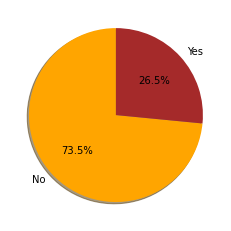

In [211]:
# set the label of the graph
labels = "No", "Yes"
# Set the size of the piechart
sizes = churn_percentage.Churn
 # put the color on the piechart
colors = ( "orange", "brown") 
# do the plot
fig1, ax1 = plt.subplots()
explode = (0, 0) 
ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, )
# display the plot
plt.show()

So we have about 27% of monthly churners. Let's see how much the revenues are affected.

## How much is churn affecting the business? How big is churn compared to the existing customer base?

In [212]:
# Group by churn and charges and do the sommation
Churn_corr = Churn_dataset[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame()
Churn_corr['percent']= Churn_dataset[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum()/Churn_dataset.MonthlyCharges.sum()
Churn_corr

,MonthlyCharges,percent
Churn,,
No,316985.75,0.694966
Yes,139130.85,0.305034


### So because of the Churn, the company has lost about 30.5% of the revenue it makes from monthly charges. It's more than 25% of the monthly salary. The management team, especially the Marketing team and the customer service team.

In [213]:
#Replacing spaces with null values in total charges column
Churn_dataset['TotalCharges'] = Churn_dataset["TotalCharges"].replace(" ",np.nan)

C:\Users\bootcamp\Documents\Alexis Linxsly\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

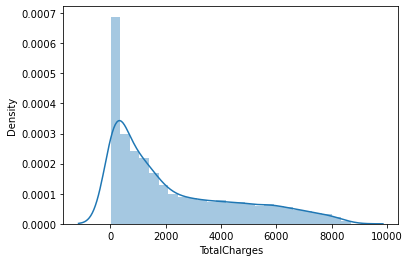

In [214]:
#Dropping null values from total charges column which contain 
Churn_dataset = Churn_dataset[Churn_dataset["TotalCharges"].notnull()]
Churn_dataset = Churn_dataset.reset_index()[Churn_dataset.columns]
Churn_dataset["TotalCharges"] = Churn_dataset["TotalCharges"].astype(float)
plt.figure()
sns.distplot(Churn_dataset['TotalCharges'],)

In [215]:
# Group by churn and charges and do the sommation
Churn_corre = Churn_dataset[['Churn','TotalCharges']].groupby(['Churn']).TotalCharges.sum().to_frame()
Churn_corre["Percent"] = Churn_dataset[['Churn','TotalCharges']].groupby(['Churn']).TotalCharges.sum().to_frame()/Churn_dataset.TotalCharges.sum()
Churn_corre

,TotalCharges,Percent
Churn,,
No,13193241.8,0.821693
Yes,2862926.9,0.178307


### The churn represents 17.8% of the total charges. A company cannot survive in this conditions. It's why we're looking for the relevant factors of the churn

In [216]:
# make a dataset where customer who churn are only considered
yes_churn_dataset=Churn_dataset[Churn_dataset["Churn"]=="Yes"]
yes_churn_dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7015,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7021,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7023,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [217]:
## make a dataset where customer who churn are only considered
no_churn_dataset=Churn_dataset[Churn_dataset["Churn"]=="No"]
no_churn_dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [218]:
# Transform categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
for col in Churn_dataset1.select_dtypes('object'):
    Churn_dataset1[col] = LabelEncoder().fit_transform(Churn_dataset1[col])
    Churn_dataset1[col] = LabelEncoder().fit_transform(Churn_dataset1[col])

In [219]:
# make a dataset where customer who churn are only considered
churn_dataset_yes=Churn_dataset1[Churn_dataset1["Churn"]==1]
churn_dataset_no=Churn_dataset1[Churn_dataset1["Churn"]==0]

In [220]:
# Making a pivot table with demographics and where there's no churn...
Pivot_table1=Churn_dataset[Churn_dataset['Churn']=='No'].pivot_table(columns='Churn',index=['gender','SeniorCitizen','Partner','Dependents'],values='customerID', aggfunc='count')
Pivot_table1

Churn                                     No
gender SeniorCitizen Partner Dependents     
Female 0             No      No          909
                             Yes         110
                     Yes     No          482
                             Yes         715
       1             No      No          159
                             Yes           2
                     Yes     No          136
                             Yes          31
Male   0             No      No          963
                             Yes         166
                     Yes     No          439
                             Yes         713
       1             No      No          126
                             Yes           4
                     Yes     No          176
                             Yes          32

In [221]:
### Making a pivot table with demographics and where there's churn...
Pivot_Table=Churn_dataset[Churn_dataset['Churn']=='Yes'].pivot_table(columns='Churn',index=['gender','SeniorCitizen','Partner','Dependents'],values='customerID', aggfunc='count')
Pivot_Table["percent"]=Pivot_Table.apply(lambda x: x/Pivot_Table.shape[0])
Pivot_Table

Churn                                    Yes  percent
gender SeniorCitizen Partner Dependents              
Female 0             No      No          429  26.8125
                             Yes          32   2.0000
                     Yes     No          114   7.1250
                             Yes         124   7.7500
       1             No      No          158   9.8750
                             Yes           1   0.0625
                     Yes     No           73   4.5625
                             Yes           8   0.5000
Male   0             No      No          418  26.1250
                             Yes          43   2.6875
                     Yes     No          128   8.0000
                             Yes         105   6.5625
       1             No      No          118   7.3750
                             Yes           1   0.0625
                     Yes     No          105   6.5625
                             Yes          12   0.7500

In [222]:
Churn_dataset[Churn_dataset['Churn']=='Yes' ].pivot_table(columns='Churn',index=['InternetService','MultipleLines',],values='customerID', aggfunc='count')


Churn                             Yes
InternetService MultipleLines        
DSL             No                216
                No phone service  170
                Yes                73
Fiber optic     No                530
                Yes               767
No              No                103
                Yes                10

## The marketing team wants to find out who the most likely people to churn are and create content that suits their interests:

After our analysis, we can conclude that people who tend to unsubscribe are:
### 1- The customer is single, who are not senior citizen, and doesn't have dependents ( 429 customers)
### 2- The customer is single, who are not senior citizen, and doesn't have dependents ( 418 customers)
### 3- The customer is single, who are senior citizen, and doesn't have dependents ( 158 customers)
### 4- The customer is single, who are senior citizen, and doesn't have dependents ( 128 customers)

Does this means that single people, who are not dependents and who are senior citizen, are more likely to unsubscribe than those who are in a relationship?


## Explain churn by the below categories. Are there any factors that combine to be especially impactful?
### a. Customer demographics like age and gender
### b. Services used
### c. Billing information

In [223]:
Churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [224]:
#Replace Yes and No by 0, 1
Churn_dataset['Churn'] = Churn_dataset.Churn.replace({'Yes': 1, 'No': 0})
Churn_dataset['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [225]:
# function to do CrossTable
def cross_table(x):
  cross__table = pd.crosstab(yes_churn_dataset[x] , yes_churn_dataset.Churn, normalize=True ,margins=True)
  return cross__table

In [226]:
# Define a function that can group the churn by category and plot a barchart to visualize them
def Churn_category(x):
    churn_category = pd.DataFrame(Churn_dataset.groupby(x)[['Churn']].mean())
    #churn_category.reset_index(level=0, inplace=True)
    ax1 = plt.figure(figsize=(6,4))
    plt.bar(churn_category.index, churn_category['Churn'] ,color = ['coral','brown','red'], edgecolor="black", )
    plt.title('Distribution of churn by '+ x,size=12)
    for i in range(len(churn_category['Churn'])):
            plt.text(i,0.1, str(round(churn_category['Churn'].values[i]*100,2))+"%", fontsize =14, horizontalalignment='center', verticalalignment='center', )
    return churn_category

In [227]:
#We define a function that can generate barchart
def generate_barchart(data=Churn_dataset, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6),horizontal=True,):
  plt.figure(figsize=figsize)
  if horizontal:
      axes = sns.barplot(data=data,x=abs_value,y=data.index)
      i=0
      for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(tot/2,
                  i,
                  str(np.round(perc*100,2))+ "%",
                    fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                  )
        axes.text(tot+3,
                  i,
                  str(tot),
                    fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                  )
        
        i+=1
      plt.title(title)
      plt.show()
  else:
        axes = sns.barplot(data=data,y=abs_value,x=data.index)
        i=0
        for tot, perc in zip(data[abs_value],data[rel_value]):
          axes.text(i,
                    tot/2,
                    str(np.round(perc*100,2))+ "%",
                      fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                    )
          axes.text(i,
                    tot+3,
                    str(tot),
                      fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                    )
          
          i+=1
        plt.title(title)
        plt.show()

In [228]:

#This fucntion will show the plot and will show the probability
def prob_category(data,top_n =6,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=True):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize,horizontal=horizontal)
     return result

# Churn by demographic info about customers

## Gender

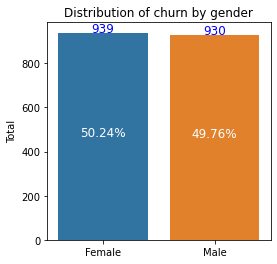

,Total,Percent
Female,939,0.502408
Male,930,0.497592


In [229]:
# Make pivotable with gender column
prob_category(data=yes_churn_dataset,top_n =6,col="gender", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by gender",figsize=(4,4),horizontal=False)

### Among the dataset, we can notice that 50.24% of the female clients have churned. And 49.76% of the male clients have churned. This is not so significative because there a no greater difference between the two groups.

,Churn
gender,
Female,0.269595
Male,0.262046


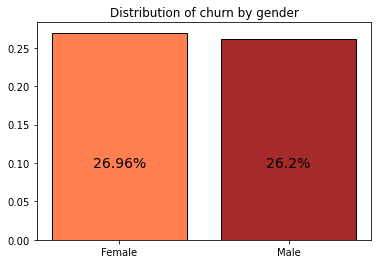

In [230]:
Churn_category("gender")

### That means, more than 25% of the two genders(26.96% female, 26.2% male) represented in the dataset have churned. This is not a great insight because it won't help us to take better decision because there is no greater difference between the two groups. Let's confirm this with a t-test on the difference of both independant proportions:

In [231]:
import scipy.stats as stats
crosstab = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["gender"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(crosstab)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.4904884707065509
Independent (H0 holds true)


### There's no significant difference since the p-value = 0.49 > 0.05. We may not reject the hypothesis of null difference between the proportions. It means the Churn doesn't really depends on the gender of the customer, both genders churn as much as each other.

## Dependents

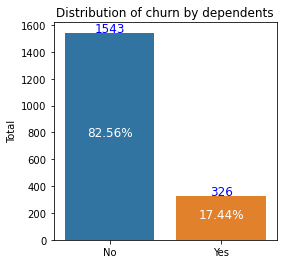

,Total,Percent
No,1543,0.825575
Yes,326,0.174425


In [232]:
prob_category(data=yes_churn_dataset,top_n =6,col="Dependents", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by dependents",figsize=(4,4),horizontal=False)

### In this graph we can see that more than 82.55% of the customer who doesn't have dependents has churned instead of 17.44% of the one who has dependents. It's relevant because, there are more than 80% of churn in the class of the customers who doesn't have dependents. Let's see how important it is to the category. 

,Churn
Dependents,
No,0.312791
Yes,0.155312


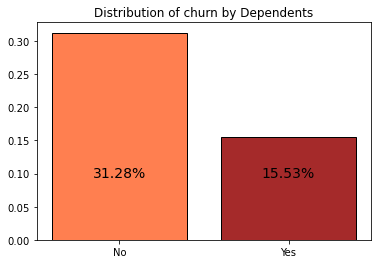

In [233]:
Churn_category("Dependents")

In [234]:
churn_dependent = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["Dependents"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_dependent)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.0196592017051303e-42
Dependent (reject H0)


### Among the customer who doesn't have dependents the percentage of churn is 31.28%, and for the others only 15.53%. The churn is two time bigger for the customer who has no dependents than the one who has dependent. This is relevant! The churn depends on if the customer have dependednts or not. The chi2 test confirms it.

## By Marital status

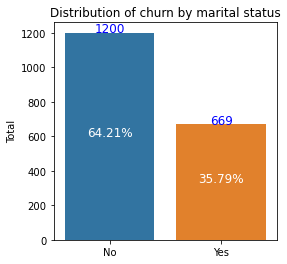

,Total,Percent
No,1200,0.642055
Yes,669,0.357945


In [235]:
prob_category(data=yes_churn_dataset,top_n =6,col="Partner", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by marital status",figsize=(4,4),horizontal=False)

### In this graph we can see that 64.2% of the customer who doesn't have a partner have churned instead of 35.8% of the one who has a partner. It's relevant because, there are more than 60% of churn in the class of the customers who doesn't have a partner. Let's see how important it is to the category. 

,Churn
Partner,
No,0.329761
Yes,0.197171


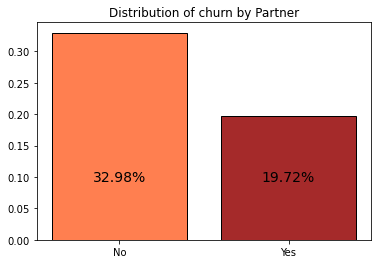

In [236]:
Churn_category("Partner")

In [237]:
churn_Partner= pd.crosstab(Churn_dataset["Churn"], Churn_dataset["Partner"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_Partner)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.97379757451591e-36
Dependent (reject H0)


### Among the customer who doesn't have a partner the percentage of churn is 32.98%, and for the others only 19.72%. The churn is so important for the customer who doesn't have a partner, because more than a quarter of them have churned. This is interesting!

## By Senior Citizenship

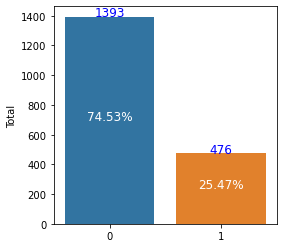

,Total,Percent
0,1393,0.745318
1,476,0.254682


In [238]:
prob_category(data=yes_churn_dataset,top_n =6,col="SeniorCitizen", abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(4,4),horizontal=False)

### We know that 0 represents No, and 1 equals to Yes. This graph let us see that more than 74.53% of the customer who are not senio citizens have churned. And for the one who are senior citizens, only 25.47% of them have churned. It's relevant! Can we say that the more a customer is senior citizen, the less he tends to churn?

,Churn
SeniorCitizen,
0,0.236503
1,0.416813


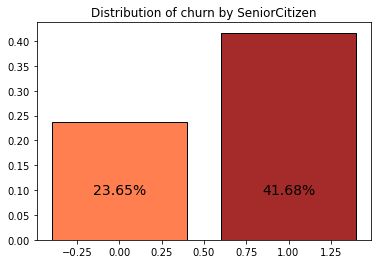

In [239]:
Churn_category("SeniorCitizen")

In [240]:
churn_SeniorCitizen= pd.crosstab(Churn_dataset["Churn"], Churn_dataset["SeniorCitizen"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_SeniorCitizen)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.4792557203954705e-36
Dependent (reject H0)


### The percentage of churn represents 23.65%  of the customer who are not senior citizen. But for the customer who are senior citizens, it represents 41.68%. It's significant! And the chi2 test confirms that there's dependency between this two variables

# Churn by type of service

## Phone Service

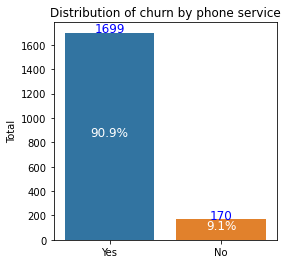

,Total,Percent
Yes,1699,0.909042
No,170,0.090958


In [241]:
prob_category(data=yes_churn_dataset,top_n =6,col="PhoneService", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by phone service",figsize=(4,4),horizontal=False)

### More than 90.90% of the customer who have a phone service have churned. Instead of 9.09% of churns between the customers who don't have a phone service. It's interesting. Let's see how important is that for the category

,Churn
PhoneService,
No,0.250000
Yes,0.267475


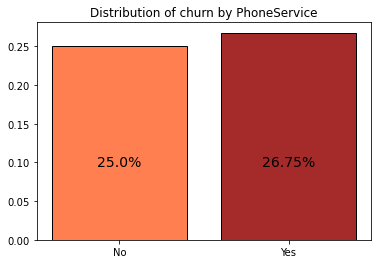

In [242]:
Churn_category("PhoneService")

In [243]:
churn_PhoneService= pd.crosstab(Churn_dataset["Churn"], Churn_dataset["PhoneService"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_PhoneService)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.34992398942431924
Independent (H0 holds true)


### The percentage of churn for the cutomers who have phone service is 26.75%, and for the ones who don't have phone service 25%. It's not more relevant.

## Internet Service

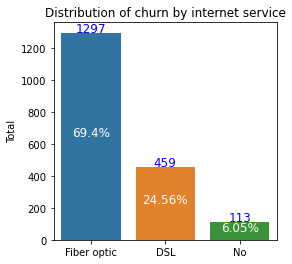

,Total,Percent
Fiber optic,1297,0.693954
DSL,459,0.245586
No,113,0.060460


In [244]:
prob_category(data=yes_churn_dataset,top_n =6,col="InternetService", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by internet service",figsize=(4,4),horizontal=False)

### More than 69.39% of the customers who have an internet service especially a fiber optic have churned and 24.55% of them have a DSL. Instead of 6.04% of churns between the customers who don't have an internet service. It's interesting. Let's see how important is that for each category

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


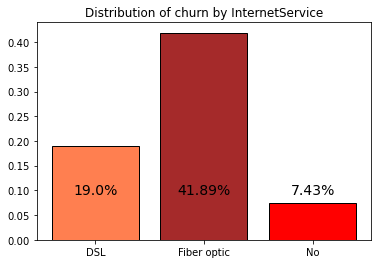

In [245]:
Churn_category("InternetService")

In [246]:
churn_InternetService = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["InternetService"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_InternetService)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 5.831198962236941e-159
Dependent (reject H0)


### We can see that more than 19% of the customers who have an internet service especially DSL service have churned and 41.89% of the ones who have Fiber optic have churned. On the other hand only 7.43% of the one who don't have phone service churned. It's very relevant! Most of the people who have churned have an internet service. Can we say that, having an internet service tends to increase the number of customer churn? If so, what can we do to fix that?

## Multiple Phone Lines Service

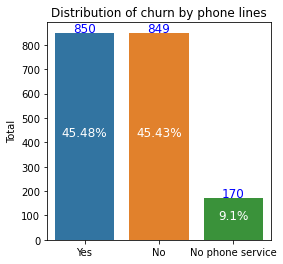

,Total,Percent
Yes,850,0.454789
No,849,0.454254
No phone service,170,0.090958


In [247]:
prob_category(data=yes_churn_dataset,top_n =6,col="MultipleLines", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by phone lines",figsize=(4,4),horizontal=False)

### This graph shows the percentage of customer churn wheter they are unsing multiple lines or not. We can notice that more than 54% of the customers who don't have multiple lines have churned. Among the customers who don't have multiple lines we can identify the one who don't have a phone service and the one who have a phone service but doesn't uses multiple lines. On the other hand 45.47% have churned.

,Churn
MultipleLines,
No,0.250812
No phone service,0.250000
Yes,0.286485


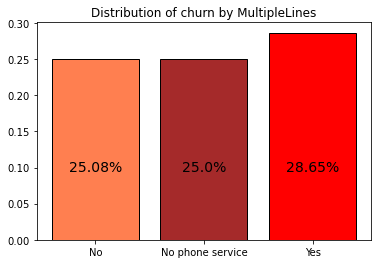

In [248]:
Churn_category("MultipleLines")


In [249]:
churn_MultipleLines = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["MultipleLines"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_MultipleLines)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0035679273999811405
Dependent (reject H0)


### This graph shows the percentage of churn for each groups. It's not so pertinent!

## Online security service

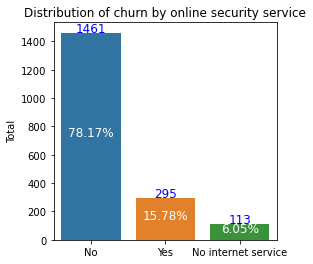

,Total,Percent
No,1461,0.781701
Yes,295,0.157838
No internet service,113,0.060460


In [250]:
prob_category(data=yes_churn_dataset,top_n =6,col="OnlineSecurity", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by online security service",figsize=(4,4),horizontal=False)

### In this graph we can noticce that there are 78.17% of churn customer who don't use an online security. It's a great insight.

,Churn
OnlineSecurity,
No,0.417787
No internet service,0.074342
Yes,0.146402


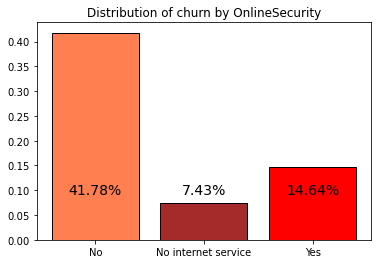

In [251]:
Churn_category("OnlineSecurity")

In [252]:
churn_OnlineSecurity = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["OnlineSecurity"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_OnlineSecurity)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.4006867477839222e-184
Dependent (reject H0)


### Among this category, we have 41.77% of customer who don't use a online security are churn customer

## Online backup service

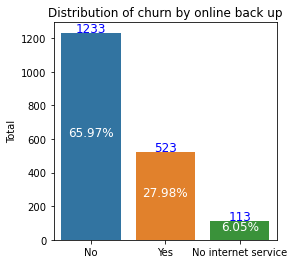

,Total,Percent
No,1233,0.659711
Yes,523,0.279829
No internet service,113,0.060460


In [253]:
prob_category(data=yes_churn_dataset,top_n =6,col="OnlineBackup", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by online back up",figsize=(4,4),horizontal=False)

### Again 65.97% of churn customer don't use an online backup. It's interesting

,Churn
OnlineBackup,
No,0.399417
No internet service,0.074342
Yes,0.215670


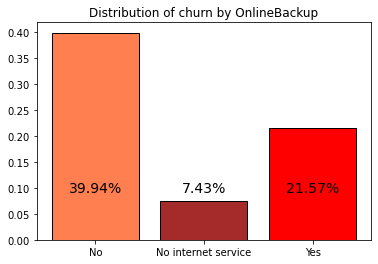

In [254]:
Churn_category("OnlineBackup")

In [255]:
churn_OnlineBackup = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["OnlineBackup"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_OnlineBackup)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 7.776099238804965e-131
Dependent (reject H0)


We can see that 39.94% is the percentage of customer churn who don't use an online backup

## Device protection service

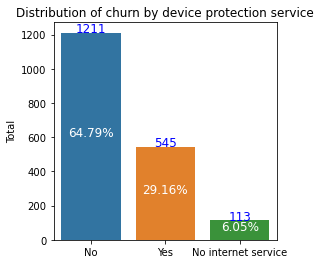

,Total,Percent
No,1211,0.64794
Yes,545,0.29160
No internet service,113,0.06046


In [256]:
prob_category(data=yes_churn_dataset,top_n =6,col="DeviceProtection", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by device protection service",figsize=(4,4),horizontal=False)

### 64.79% of churn customer don't use an device protection

,Churn
DeviceProtection,
No,0.391403
No internet service,0.074342
Yes,0.225393


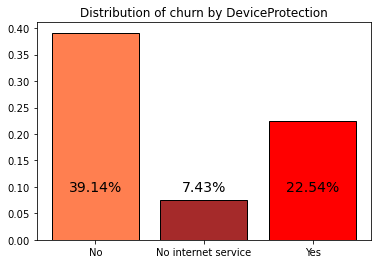

In [257]:
Churn_category("DeviceProtection")

In [258]:
churn_DeviceProtection = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["DeviceProtection"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_DeviceProtection)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.9593887862403176e-121
Dependent (reject H0)


### customer who don't use an device protection are more to churn, 39.13% of customer who don't use an device protection churn

## Tech support service

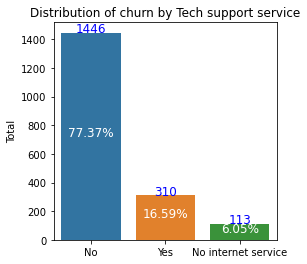

,Total,Percent
No,1446,0.773676
Yes,310,0.165864
No internet service,113,0.060460


In [259]:
prob_category(data=yes_churn_dataset,top_n =6,col="TechSupport", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by Tech support service",figsize=(4,4),horizontal=False)

### 77.37% of churn customer don't have an TechSupport

,Churn
TechSupport,
No,0.416475
No internet service,0.074342
Yes,0.151961


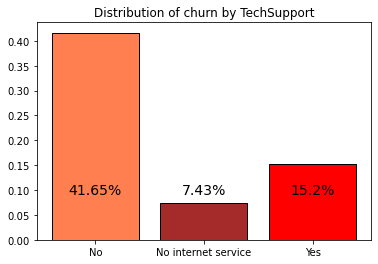

In [260]:
Churn_category("TechSupport")

In [261]:
churn_TechSupport = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["TechSupport"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_TechSupport)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 7.407807748843288e-180
Dependent (reject H0)


### Customer who don't have the service of tech Support are more to churn , 41.65% of customer who don't have an tech support are churn customer.

## Streaming TV service

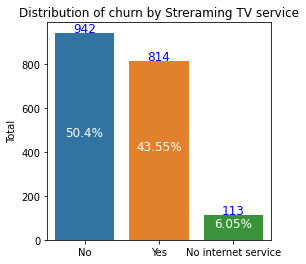

,Total,Percent
No,942,0.504013
Yes,814,0.435527
No internet service,113,0.060460


In [262]:
prob_category(data=yes_churn_dataset,top_n =6,col="StreamingTV", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by Streraming TV service",figsize=(4,4),horizontal=False)

### There are 50.4% of Churn customer who don't use streamingTV, beside 43.55% who use it

,Churn
StreamingTV,
No,0.335351
No internet service,0.074342
Yes,0.301147


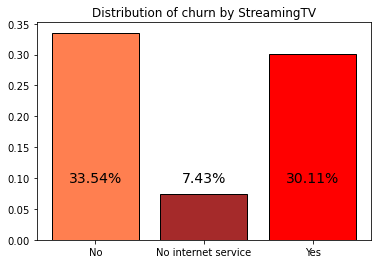

In [263]:
Churn_category("StreamingTV")

In [264]:
churn_StreamingTV = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["StreamingTV"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_StreamingTV)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.3246411131691968e-81
Dependent (reject H0)


### Customers who don't use streaming TV are more to churn than customers who use it, though the difference is not really great, 33.54% and 30.11% respectively

## Streaming movies service

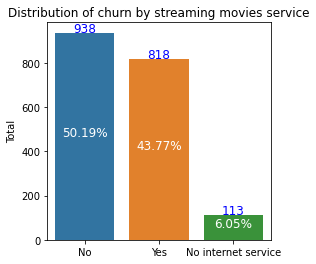

,Total,Percent
No,938,0.501873
Yes,818,0.437667
No internet service,113,0.060460


In [265]:
prob_category(data=yes_churn_dataset,top_n =6,col="StreamingMovies", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by streaming movies service",figsize=(4,4),horizontal=False)


### There are 50.19% of Churn customer who don't use streamingMovies, beside 43.77% who use it

,Churn
StreamingMovies,
No,0.337289
No internet service,0.074342
Yes,0.299524


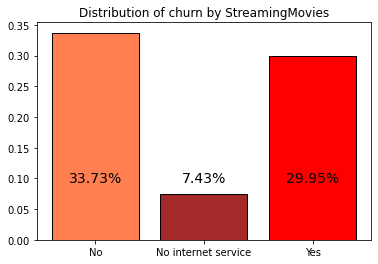

In [266]:
Churn_category("StreamingMovies")

In [267]:
churn_StreamingMovies = pd.crosstab(Churn_dataset["Churn"], Churn_dataset["StreamingMovies"])
#perform chi-2 test

stat, p, dof, expected = stats.chi2_contingency(churn_StreamingMovies)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 5.353560421401323e-82
Dependent (reject H0)


# Churn by customer account information

## PaperlessBilling

In [268]:
cross_table("PaperlessBilling")

Churn,Yes,All
PaperlessBilling,,
No,0.250936,0.250936
Yes,0.749064,0.749064
All,1.000000,1.000000


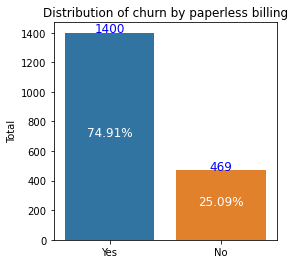

,Total,Percent
Yes,1400,0.749064
No,469,0.250936


In [269]:
prob_category(data=yes_churn_dataset,top_n =6,col="PaperlessBilling", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by paperless billing",figsize=(4,4),horizontal=False)

### 74.91% of churn customer use a paperless Billing

,Churn
PaperlessBilling,
No,0.163757
Yes,0.335893


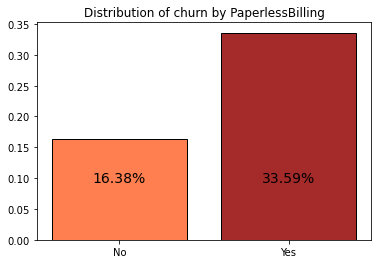

In [270]:
Churn_category("PaperlessBilling")

### 33.57% of customer who use paperless Billing are churn customer

## tenure

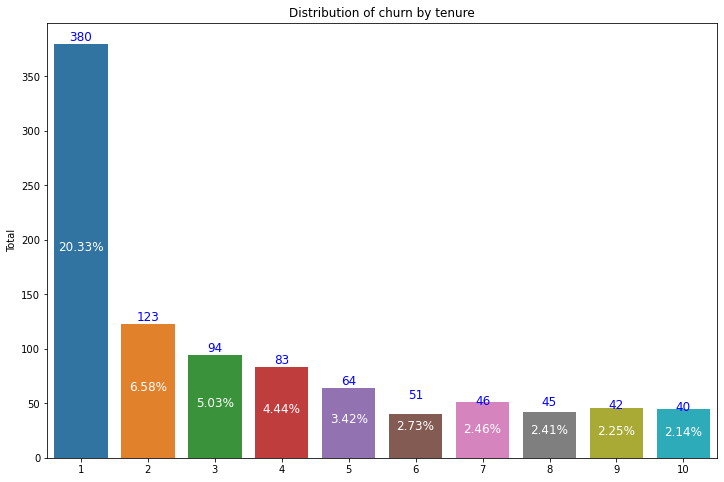

,Total,Percent
1,380,0.203317
2,123,0.065811
3,94,0.050294
4,83,0.044409
5,64,0.034243
7,51,0.027287
9,46,0.024612
10,45,0.024077
8,42,0.022472
6,40,0.021402


In [271]:
prob_category(data=yes_churn_dataset,top_n =10,col="tenure", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by tenure",figsize=(12,8),horizontal=False)

In [272]:
labels  = [f"{i} - {i+12}" for i in range(0,12,12)]
labels2 = [f"{i+1} - {i+12}" for i in range(12,72,12)]
labels.extend(labels2)
Churn_dataset['tenure_group'] = pd.cut(Churn_dataset.tenure, bins=[0, 12, 24, 36, 48, 60, 72],labels=labels, right=True)

In [273]:
churn_tenure_count  = Churn_dataset.pivot_table(index="tenure_group",columns="Churn",values ="customerID",aggfunc="count", margins=True)
churn_tenure_count

Churn,0,1,All
tenure_group,,,
0 - 12,1138,1037,2175
13 - 24,730,294,1024
25 - 36,652,180,832
37 - 48,617,145,762
49 - 60,712,120,832
61 - 72,1314,93,1407
All,5163,1869,7032


### There is more customers under 12 months who have churned during the last month. That means people under a year of suscribing tend to leave the company.

## Contract

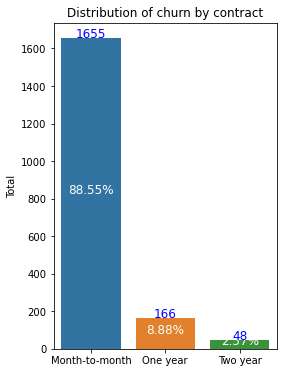

,Total,Percent
Month-to-month,1655,0.885500
One year,166,0.088818
Two year,48,0.025682


In [274]:
prob_category(data=yes_churn_dataset,top_n =6,col="Contract", abs_value ="Total",rel_value ="Percent",show_plot=True, title="Distribution of churn by contract",figsize=(4,6),horizontal=False)

### Well we have 88.55% of churn customer have a contract Month to month, though There are in general more contract month to month than the others, but it's enough interesting.

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


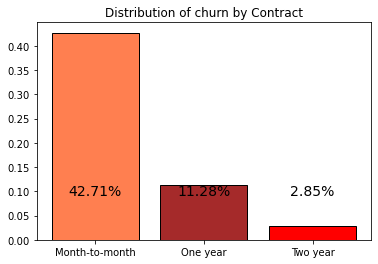

In [275]:
Churn_category("Contract")

### Well it's true 42.71% of customer that have an contract of month to month are churn customer, a people that have an contract of two years are less to churn, which is understandable

## Payment Method

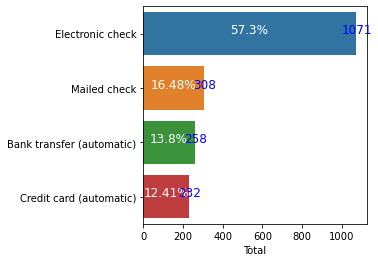

,Total,Percent
Electronic check,1071,0.573034
Mailed check,308,0.164794
Bank transfer (automatic),258,0.138042
Credit card (automatic),232,0.124131


In [276]:
prob_category(data=yes_churn_dataset,top_n =6,col="PaymentMethod", abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(4,4),horizontal=True)

### Most of churn customer use electronic check as payment method, most of 57.3% of churn customer

,Churn
PaymentMethod,
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531
Electronic check,0.452854
Mailed check,0.192020


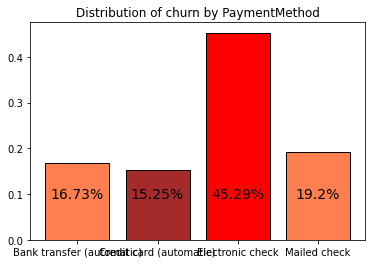

In [277]:
Churn_category("PaymentMethod", )

### so we can see now 45.29% of customer who use electronic check as payment method are churn customer .

Text(0, 0.5, 'Total Charges')

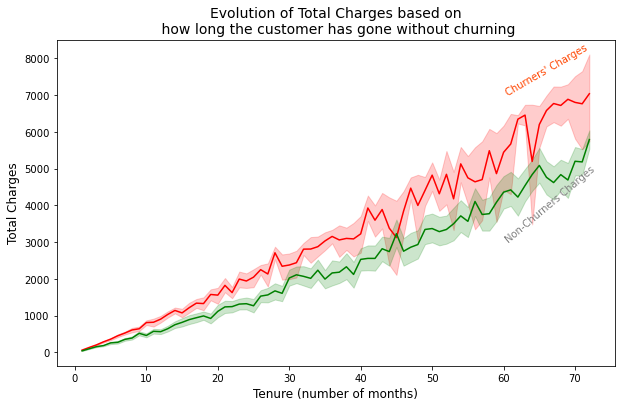

In [278]:
ax = plt.figure(figsize=(10,6))
sns.lineplot(y=Churn_dataset.TotalCharges[Churn_dataset.Churn==1], x=Churn_dataset.tenure[Churn_dataset.Churn==1], data=Churn_dataset, color='red')
sns.lineplot(x=Churn_dataset.tenure[Churn_dataset.Churn==0], y=Churn_dataset.TotalCharges[Churn_dataset.Churn==0], data=Churn_dataset, color='green')
plt.text(60, 7000, "Churners' Charges", color='orangered', rotation=30)
plt.text(60, 3000, "Non-Churners Charges", rotation = 40, color='grey')
plt.title('Evolution of Total Charges based on\n how long the customer has gone without churning', size=14)
plt.xlabel('Tenure (number of months)', size=12)
plt.ylabel('Total Charges', size=12)

### This graph shows the trend of total charged based on the tenure of the customer. The more a customer last longer, the more the total of churner's charges tends to increase. It is the same trend for the total non churner's charges.

In [279]:
Churn_dataset[Churn_dataset['Churn']=='Yes'].pivot_table(columns='Churn',index=['Contract','PaymentMethod','PaperlessBilling'],values='customerID', aggfunc='count',)

Contract,PaymentMethod,PaperlessBilling


### What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

### 1-Phone Service
### 2-Multiple Lines
### We can't take the phone service because the Chi-Square test shows that the churn is independent of the phone service